>![image](jmuLOGO.png)
>
> # Math 248 Computers and Numerical Algorithms
> # Hala Nelson
> # Week 7: Singular Value Decomposition $A=U\Sigma V^t$: The big picture  

# Given a matrix of real numbers, we want to understand the following, depending on our use case:

1. If the matrix represents data that we care for, like images, or tabular data, what are the most important components of this matrix (data)?
2. Along what important directions is the data mostly spread (directions with most variation in the data)? 
3. If I think of a matrix $A_{m\times n}$ as a transformation from the initial space $\mathbb{R}^n$ to the target space $\mathbb{R}^m$, what is the effect of this matrix on vectors in $\mathbb{R}^n$? To which vectors do they get sent to in $\mathbb{R}^m$?
4. What is the effect of this matrix on space itself? Since this is a linear transormation we know there is no space warping, but there is space stretching, squeezing, rotating, reflecting.
5. Can we solve the system of linear equations $Ax=b$? What is the best way to go about this? If there is no solution, is there an approximate solution that satisfies our purposes? Notice that here you are looking for the vector $x$ that gets transformed to $b$ when you act on it with $A$.

The singular value decomposition can be used to answer all the above quesions. The first two questions are intrinsic to the matrix itself, while the second two questions have to do with the effect of multiplying the matrix with vectors (the matrix acts on space and the vectors in this space). The fifth question has to do with the very important problem of solving systems of linear equations and appears in all kinds of applications.

So we can investigate a matrix of numbers in two ways: 
- What are its intrinsic properties? 
- What are its properties when used as a transformation? 

These two are related because the matrix's intrinsic properties affect how it acts on vectors or space when applied to those.

# There are three ways to multiply two matrices $A_{m\times n}$ and $B_{n\times s}$ together:

1. ## Row-column approach: 

Produce one entry $(ab)_{ij}$ at a time by taking the dot product of the i'th row from A with the j'th column from B:

$$(ab)_{ij}=\sum_{k=1}^n a_{ik}b_{kj}$$

2. ## Column-columns approach: 

Produce one column $(AB)_{l}$ at a time by linearly combining the columns of $A$ with the entries in the columns of $B$:

$$(AB)_l=b_{1l}A_1+b_{2l}A_2+\dots +b_{nl}A_n$$

3. ## Column-row approach: 

Produce rank one pieces of the product one at a time by multiplying a column of $A$ with the corresponding row of $B$, then add all these rank one matrices together to get the final product $AB$:

$$AB=A_1B^r_1+A_2B^r_2+\dots+A_nB^r_n$$
where $A_l$ is the $l$th column of $A$ and $B^r_l$ is the $l$th row of $B$.

## Multiplying by a diagonal matrix $\Sigma$:

1. If you multiply $A$ by $\Sigma$ from the right $A\Sigma$ then you scale the columns of $A$ by the $\sigma$'s.
2. If you multiply $A$ by $\Sigma$ from the left $\Sigma A$ then you scale the rows of $A$ by the $\sigma$'s.

# Because of the singular value decomposition, any matrix A can be expressed as sum one rank one matrices with decreasing order of importance

$A=U\Sigma V^t$: Using the column-row method to multiply matrices, we can expand this product using the sum of rank one matrices method to multiply $U\Sigma$ with $V^t$ (note that $U\Sigma$ scales each colum $U_i$ of $U$ by $\sigma_i$):

$$A=U\Sigma V^t=\sigma_1U_1V_1^t+\sigma_2U_2V_2^t+\dots+\sigma_rU_rV_r^t$$
where $r$ is the rank of the matrix $A$. The great thing about this expression is that it splits $A$ into a sum of rank one matrices arranged according to their order of importance. Moreover, it provides a straightforward way to approximate $A$ by lower rank matrices by setting lower sigular values to zero.


# The ingredients of the singular value decomposition of $A=U\Sigma V^t$:

1. The columns of $V$ are the orthonormal eigenvectors of the symmetric matrix $A^tA$
2. The columns of $U$ are the orthonormal eigenvectors of the symmetric matrix $AA^t$
3. The singular values $\sigma_1$, $\sigma_2$, $\dots$ $\sigma_r$ are the square roots of the eigenvalues of $A^tA$ or $AA^t$. The singular values are non-negative and arranged in decreasing order. The matrix could have zero singular values.
4. Recall $Av_i=\sigma_i u_i$

> **Note**: Every real symmetric positive semi-definite (non-negative eigenvalues) matrix is diagonalizable $S=PDP^{-1}$. $A^tA$ and $AA^t$ happen to both be symmetric positive semi-definite (meaning their eigenvalues are non-negative). 

# You must always remember the following properties:

1.  $A$ sends the special orthonormal vectors $v_i$ of its initial space to scalar multiples of the special orthonormal vectors $u_i$ of its target space: $$Av_i=\sigma_i u_i$$

2. **Determinant of a square matrix**: If your matrix is square, then its determinant is equal to the product of all its singular values: $\sigma_1\sigma_2\dots\sigma_r$.

3. The **condition number** of a matrix (with respect to the $l^2$ norm= usual distance in Euclidean space) is the ratio of the largest singular value to the smallest singular value:
$$\kappa=\frac{\sigma_1}{\sigma_r}.$$

**The condition number of a matrix is very important for computational stability:**

- It measures how much $A$ stretches space. If the condition number is too large, then it stretches space too much in one direction relative to another direction, and it could be dangerous to do computations in such an extremely stretched space: Solving $Ax=b$ when $A$ has a large condition number will make the solution $x$ unstable in the sense that it is extremely sensitive to perturbations in $b$. A small error in $b$ will result in a solution $x$ that is wildly different than the solution without the error in $b$. It is easy to envision this instability geometrically.

- One thing about a matrix with a large condition number: It stretches space too much that it almost collapses it into a space of lower dimension. The inetresting part is that if you decide to throw away that very small singular value and hence work in the collapsed space of lower dimension, your computations become perfectly fine. So at the boundaries of extremeness lies normalcy, except in a lower dimension. 

- Many iterative numerical methods, including the very useful gradient descent, have matrices involved in their analysis. If the condition number of these matrices is too large, then the iterative method might not converge to a solution. The condition number controls how fast these iterative methods converge. 

- So numerically solving $Ax=b$ (say by Gaussian Elimination) and iterative methods work fine when the involved matrices have reasonable (not very large) condition numbers.

# Using the singular value decomposition to 'invert' *any* matrix through the pseudo-inverse:

Since any matrix has a singular value decomposition, we can define the pseudo-inverse $$A=U\Sigma V^t$$ $$A^+=V\Sigma^+U^t,$$ where $\Sigma^+$ is obtained from $\Sigma$ by inverting all its diagonal entries except for the ones which are zero (or very close to zero if the matrix happens to be ill-conditioned).

This allows us to find 'solutions' to *any* system of linear equation $Ax=b$, namely $x=A^+b$. 

> **Note** The pseudo-inverse of a matrix that has shape $4\times 2$ would be a matrix of shape $2\times 4$. Think of it this way: If a matrix sends two dimensional vectors to four dimensional vectors, then its pseudo-inverse would send four dimensional vectors to two dimensional ones.

> **Note** The pseudo-inverse of a matrix coincides with its inverse when the inverse exists.

# It is important to learn more about symmetric matrices to be able to understand the ingredients of the singular value decomposition. This will also help us understand the difference between the sigular value decomposition $A=U\Sigma V^t$ and the eigenvalue decomposition $A=PDP^{-1}$ when the latter exists. 

> **Note** The Singular Value Decomposition always exists, but the eigenvalue decomposition exists only for special matrices, called diagonalizable. Also rectangular matrices are never diagonalizable. When the matrix is diagonalizable, the SVD and the eigenvalue decomposition are NOT EQUAL, unless the matrix is symmetric and has non-negative eigenvalues. 

1. The best and easiest matrices are square diagonal matrices with the same number along the diagonal.
2. The second best ones are square diagonal matrices $D$ that don't necessarily have the same numbers along the diagonal.
3. The third best matrices are symmetric matrices. These have real eigenvalues and orthogonal eigenvectors. They are the next closest type of matrices to diagonal matrices, in the sense that they are diagonalizable $S=PDP^{-1}$, or similar to a diagonal matrix after a change in basis. The columns of $P$ (eigenvectors) are orthogonal.   
4. The fourth best matrices are square matrices that are diagonalizable $A=PDP^{-1}$. These are similar to a diagonal matrix after a change of basis, however, the columns of $P$ (eigenvectors) need not be orthogonal. 
5. The fifth best matrices are all the rest. These are not diagonalizable, meaning there is no change of basis that can turn them diagonal, however, there is the next closest approach to making them similar to a diagonal matrix, via the singular value decomposition $A=U\Sigma V^t$. Here $U$ and $V$ are different than each other, and they have orthonormal columns and rows. Their inverse is very easy, since it is the same as their transpose. The singular value decomposition works for both square and non-square matrices. 
6. For any matrix $A$, $A^tA$ and $AA^t$ happen to both be symmetric positive semi-definite (meaning their eigenvalues are non-negative), so they are diagonalizable with two bases of orthogonal eigenvectors. When we divide by the norm of these orthogonal eigenvectors they become orthonormal. These will be the columns of $V$ and of $U$ respectively. $A^tA$ and $AA^t$ have exactly the same nonnegative eigenvalues, $\lambda_i=\sigma_i^2$. Arrange these in decreasing order (keeping the corresponding eigenvector order in $U$ and $V$), and we get the diagonal matrix $\Sigma$ in the singular value decomposition.
7. **What if the matrix we start with is symmetric? How is its singular value decomposition $A=U\Sigma V^t$ related to its diagonalization $A=PDP^{-1}$**? 

* The columns of $P$, which are the eigenvectors of symmetric $A$ are orthogonal. When you divide by their lengths, they become orthonormal. Stack these orthonormal eigenvectors vectors in a matrix in the order corresponding to decreasing absolute value of the eigenvalues and you get both the $U$ and the $V$ for the singular value decomposition. 

* Now if all the eigenvalues of symmetric $A$ happen to be nonnegative, the singular value decomposition of this positive semi-definite symmetric matrix will be the same as its eigenvalue decomposition, provided you normalize the orthogonal eigenvectors in $P$, order them with respect to the nonnegative eigenvalues in decreasing order. So $U=V$ in this case. 

* What if some (or all) of the eigenvalues are negative? Then the singular values $\sigma_i=|\lambda_i|=-\lambda_i$, but now you have to be careful with the corresponding eigenvectors $Av_i=-\lambda_i v_i=\lambda_i(-v_i)=\sigma_iu_i$. This makes $U$ and $V$ in the singular value decomposition unequal. So the singular value decomposition of a symmetric matrix that has some negative eigenvalues can be easily extracted from its eigenvalue decomposition, but it is not exactly the same.

8. **What if the matrix we start with is not symmteric but diagonalizable? How is its singular value decomposition $A=U\Sigma V^t$ related to its diagonalization $A=PDP^{-1}$**? The eigenvectors of $A$, which are the columns of $P$ are in general not orthogonal in this case, so the singular value decomposition and the eigenvalue decomposition of such a matrix are not related.

# The singular value decomposition is extremely important in Data Science, Machine Learning, and Artificial Intelligence, for example, it is the mathematics behind principal component analysis and latent semantic analysis.

# How do Python and others numerically calculate the SVD of a matrix?

In theory, calculating the SVD for a general matrix or the eigenvalues and eigenvectors for a square matrix requires solving for the eigenvalues (setting a polynomial=0), then solving a linear system of equations to obtain the eigenvectors. This is very far from being applicable in practice, since the problem of finding the zeros of a polynomial is very sensitive to the variations in the coefficients of the polynomials, so the computational problem becomes very prone to round off errors that are present in the coefficients. We need numerical methods that find the eigenvectors and eigenvalues without having to numerically compute the zeros of a polynomial. We also need to be careful solving a linear system of equations. We need a stable method, or if we use Gaussian elimination ($LU$ decomposition), we need to be careful that the matrix is well conditioned.

# One easy numerical way to obtain eigenvectors of a square matrix

An eigenvector of a square matrix $A$ is a nonzero vector that does not change its direction when multiplied by $A$, it just gets scaled by an eigenvalue $\lambda$:
$$Av=\lambda v.$$

Here is an easy numerical algorithm to find an eigenvector of a matrix (the eigenvector it will find is the one corresponding to the largest eigenvalue. So this algorithm catches the direction that gets stretched the most, but not the others):
1. Start at a random unit vector $v_0$
2. Multiply by $A$: $v_{i+1}=Av_i$
3. Divide by the length of $v_{i+1}$ to avoid the size of your vectors growing too large.
3. Stop when you converge.

The above iterative method is very simple but has a drawback: It only finds one eigenvector of the matrix, the eigenvector corresponding to its largest eigenvalue. So it finds the direction that gets stretched the most when you apply $A$.

In general, Python uses a mechanism called Housholder reflections and the $QR$ decomposition of a matrix to compute its full eigenvector decomposition (full spectrum). Recall that to compute the SVD we must find the eigenvectors and eigenvalues of $A^tA$ and $AA^t$. 

# Example: Iterative algorithm to compute the eigenvector of a matrix corresponding to its largest eigenvalue.

This algorithm catches only one eigenvector, in the direction that gets stretched the most, but not the other eigenvectors:

Consider the matrix $A=\begin{pmatrix}1&2\\2&-3\end{pmatrix}$

1. Start at a random unit vector $v_0$ (make sure your vector has length $1$). 
2. Multiply by $A$: $v_{i+1}=Av_i$
3. Divide by the length of $v_{i+1}$ to avoid the size of your vectors growing too large with all the multiplications by $A$.
3. Stop when you converge (you can run this for like 20 times and see if the vector is changing or not).
4. Make a plot that shows the subsequent transformations of your vector until you converge.

The above iterative method is very simple but has a drawback: It only finds one eigenvector of the matrix, the eigenvector corresponding to its largest eigenvalue. So it finds the direction that gets stretched the most when you apply $A$.

[1, 0]
[0.4472136  0.89442719]
[ 0.78086881 -0.62469505]
[-0.1351132   0.99083017]
[ 0.49483862 -0.86898489]
[-0.3266748  0.9451368]
[ 0.40898444 -0.91254136]
[-0.37000749  0.92902877]
[ 0.38871252 -0.92135909]
[-0.37979817  0.92506937]
[ 0.3840601 -0.9233081]
[-0.38202565  0.92415172]
[ 0.38299752 -0.92374937]
[-0.38253341  0.92394166]
[ 0.38275508 -0.92384985]
[-0.38264921  0.92389371]
[ 0.38269977 -0.92387276]
[-0.38267563  0.92388277]
[ 0.38268716 -0.92387799]
[-0.38268165  0.92388027]
[ 0.38268428 -0.92387918]
[-0.38268303  0.9238797 ]
[ 0.38268363 -0.92387945]
[-0.38268334  0.92387957]
[ 0.38268348 -0.92387951]
[-0.38268341  0.92387954]
[ 0.38268344 -0.92387953]
[-0.38268343  0.92387953]
[ 0.38268343 -0.92387953]

 v= [-0.38268343  0.92387953]
Av= [ 1.46507563 -3.53700546]
$\lambda=$ -3.828427140993716
$\lambda=$ -3.8284271219585553


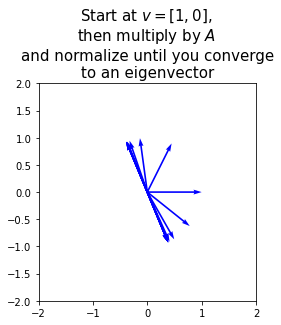

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# set the figure
plt.plot(figsize=(20,20))
plt.axis('scaled')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('''Start at $v=[1,0]$, 
then multiply by $A$ 
and normalize until you converge
to an eigenvector''', fontsize=15)

# Define A as a numpy array
A=np.array([[1,2],[2,-3]])

# define v and subsequent multiplications by A
v=[1,0]
for i in range(1,30):
    print(v)
    plt.quiver(0,0,v[0],v[1],scale=1,scale_units='xy',angles='xy',color=['b'])
    v=A.dot(v)
    v=v/np.linalg.norm(v) # normalize the vector: make it of length 1
    
# Let's find the corresponding eigenvalue for this eigenvector. Recall: Av=lambda*v
print('\n v=',v)
print('Av=',A.dot(v))
print('$\lambda=$', A.dot(v)[0]/v[0])
print('$\lambda=$', A.dot(v)[1]/v[1])
